# Contents

-[1 Introduction](#intro)
<br>
-[2 Datasets Example](#datasets)
<br>
-[3 Model training](#model)
<br>
-[4 Conclusion](#conclusion)

<a id='intro'></a>
## 1 Introduction
Product Limit Method (PLM) was used to estimste the survival function.
<br>
In medica research, PLM can be used to measure the patient living with special treatment. In Ingenieer area, PLM can be used to predict the expected life of a machine in manufacture. 
<br>
<br>
In transportation research, PLM was used to estimate the congestion function on the road. This function use the historic congestion data (trafiic volume) to predict a probability that a congestion will occur.
<br>
<br>
Currently, Kaplan-Meier estimator and Weibull distribution are used to describe the process of Product limit method.For detaied info, can visit wikipedia__[Kaplan-Meier](https://en.wikipedia.org/wiki/Kaplan%E2%80%93Meier_estimator)__ and __[Weibull distribution](https://en.wikipedia.org/wiki/Weibull_distribution)__.
<br>
According the wiki reference, there are __[python](http://lifelines.readthedocs.io/en/latest/)__, __[SAS](https://support.sas.com/documentation/cdl/en/statug/68162/HTML/default/viewer.htm#statug_lifetest_overview.htm)__,  __[R](https://cran.r-project.org/web/packages/survival/index.html)__ packages that can be used to train PLM models.

To research the problem in bank busibess, we can assume that the maximal absence of a customer as product life. It is a variable with time(can be weeks or months). The satus of a customer, active or inactive, can be estimated as the survual status in PLM. 
<br>
We can also intro some other variables with the demographic customer features into the model, such as gender...

<a id='datasets'></a>
## 2 Datasets Example

We generate 50 observations (customers) with 3 variable ('T':maximal absence time with months, 'E': current status of a customer,'gender':gender of a customer)

In [1]:
# use some python pkgs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# generate T from 3 months to 11 months
max_absence = np.random.randint(low = 3, high= 11, size = 50)
# generate 24 male customer and 26 female customer
gender = ['M']*24 + ['F']*26

According our statistical result, the inactive rate of the customer is 10%, So we generate all 50 observations with active status ('E'=1) firstly, then we random choose 5-6 observations and set its status to be inactive ('E'=0).

In [3]:
# We choose 6 observations as inactive customers
status = [1] * 50
random_idx = np.random.randint(low=0, high=49, size=6)
for i in random_idx:
    status[i] = 0

In [4]:
# first 10 results of the Status variable:
status[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [5]:
df = pd.DataFrame({'T':max_absence, 
                   'E':status, 
                  'gender':gender})
df.head(3)

,E,T,gender
0,1,9,M
1,1,3,M
2,1,10,M


## Model Training

### 3.1 Kaplan-Meier estimator

In [6]:
from lifelines import KaplanMeierFitter

In [7]:
kmf = KaplanMeierFitter()
E = df['E']
T = df['T']

In [8]:
# train the model
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 50 observations, 6 censored>

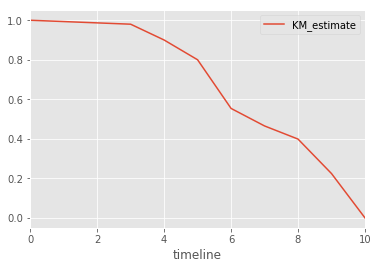

In [9]:
# plot the distribution function
kmf.survival_function_.plot();

The curve shows the probability of a customer will still be active after a absence period. We can get some inflection points from the curve.

In [10]:
# view the Median of the function
kmf.median_

7.0

The Median value with 8.0 means after 8 months absence, this Customer has a probability of 50% to be a inactive Customer.

##### Comparasion on gender

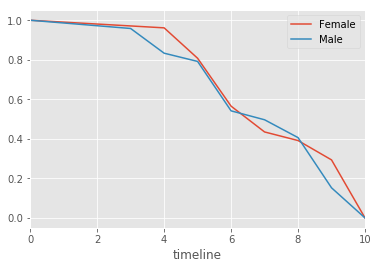

In [11]:
groups = df['gender']
idx = (groups=='M')
kmf.fit(T[~idx], E[~idx], label='Female')
ax = kmf.survival_function_.plot()

kmf.fit(T[idx], E[idx], label='Male')
kmf.survival_function_.plot(ax=ax);

Obviously, we can observe different inflection points with customers in two groups. 
<br>

### 3.2 Weibull distribution

Since kaplan-meier estimator is a non-paramateric method, weibull-distribution is a parametric model. So the fitted curve may by more smooth.
<br>
The distribution function of a weibull model can be:
$$ F(x) = 1 - e^{-(\frac{x}{\lambda})^{\rho}}$$
where $\lambda$ and $\rho$ are paramaters, they can be calculated.

In [12]:
from lifelines import WeibullFitter

In [13]:
# train the model
E = df['E']
T = df['T']
wf = WeibullFitter()
wf.fit(T, E)

<lifelines.WeibullFitter: fitted with 50 observations, 6 censored>

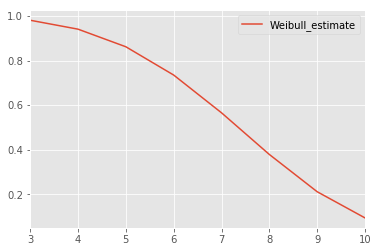

In [14]:
# plot the distribution function
wf.survival_function_.plot();

In [15]:
# show the parameter lambda and rho
print(wf.lambda_, wf.rho_)

0.124106519945 3.99260422243


In [16]:
# calculate the median of the model
wf.median_

7.3508583656842763

The Weibull distribution model predicts, after 7.35 months' absence, the customer has a probability of 50% to be inactive.

<a id='conclusion'></a>
## 4 Conclusion

Product Limit Method seems to be a effective tool to describe the status of customers. As it has been widely used in medic and ingenieering area, we can also consider to apply it into our "Inactive Customer" model.
<br>
<br>
To build a PLM model, we should generate observations with active customer and inactive customer. A variable of period should be defined, in this example we use the absence month as the "Product life", another variable is the status of the customer, active or inactive, survival or unsurvival. In addition, some demographic features can be intergrated into the observation, these features can be used for group comparision.
<br>
<br>
An obvious drawback of applying this model for "Inactive Customer" research is that we can not  estimate the maximal absence period just exactly be the "product life" of an active customer. This is also how this model is differnt from my previous experience.